## IMAGE CLASSIFICATION USING CIFAR-10 DATASET: A COMPARISON OF MANHATTAN (L1) AND EUCLIDEAN (L2) DISTANCES WITH 5-FOLD CROSS-VALIDATION
***
#### **Name:** Foysal Ahamed Nirob
#### **Id:** 19-40925-2
#### **Section:** CVPR[C]







 ## **Introduction:**

This assignment explores the classification of images using the CIFAR-10 dataset. The dataset consists of 60,000 32*32*3 color images in 10 categories. Catagories are: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. The objective is to create an image classification model and compare the Manhattan (L1) and Euclidean (L2) distance calculation methods. The model's performance will be evaluated using 5-fold cross-validation. The training data, consisting of 50,000 images, will be transformed into grayscale (32x32) to optimize computational efficiency. Additionally, a graphical representation will be generated to visualize the accuracy of different hyperparameter values (K) or number of neighbors for both distance calculation techniques. Additionally, the discussion will focus on determining the more suitable distance calculation method for this dataset, and the top 5 predictions made by the model will be presented.


## **Dataset and Preprocessing:**

I will be working with the CIFAR-10 dataset, which is widely used for image classification tasks. The CIFAR-10 dataset consists of 60,000 32x32x3 color images in ten different categories or classes.

To begin, you can download the CIFAR-10 dataset from the following link: __[CIFAR-10 Dataset](https://github.com/YoongiKim/CIFAR-10-images)__

Once I have obtained the dataset, I proceed with the preprocessing steps. Specifically, we will focus on converting the 50,000 training images to grayscale, while keeping their dimensions at 32x32 pixels. 

### **Gray Scaling our training data:**
Converting the images to grayscale helps reduce computational complexity and can improve efficiency in image classification tasks.

Importing necessary libraries:

In [14]:
#importing libraryes

import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

Following code snippet sets up directory paths for different subsets of a dataset. DATA_DIR represents the main dataset directory, while TRAIN_DATA_DIR and TEST_DATA_DIR represent the respective directories for training and test data within the main dataset directory. 

In [15]:
DATA_DIR = '/Users/neeerob/Documents/AIUB/Semester 13/COMPUTER VISION AND PATTERN RECOGNITION/Mid/CIFAR-10-images-master-original'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

This code snippet sets the image size to 32 pixels and creates a list (CATEGORIES) containing the names of the subdirectories within the TRAIN_DATA_DIR directory. 
Note: I use if statement to exxclude .DS_Store

In [16]:
IMG_SIZE = 32
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    if i != '.DS_Store':  # Exclude '.DS_Store' from the list
        CATEGORIES.append(i)
    
print(CATEGORIES)


['cat', 'dog', 'truck', 'bird', 'airplane', 'ship', 'frog', 'horse', 'deer', 'automobile']


Following code displays a grid of images from the CIFAR-10 dataset, with each row representing a different category. Ploting 10 catagory in 10 rows and 10 simple images in 10 columns.

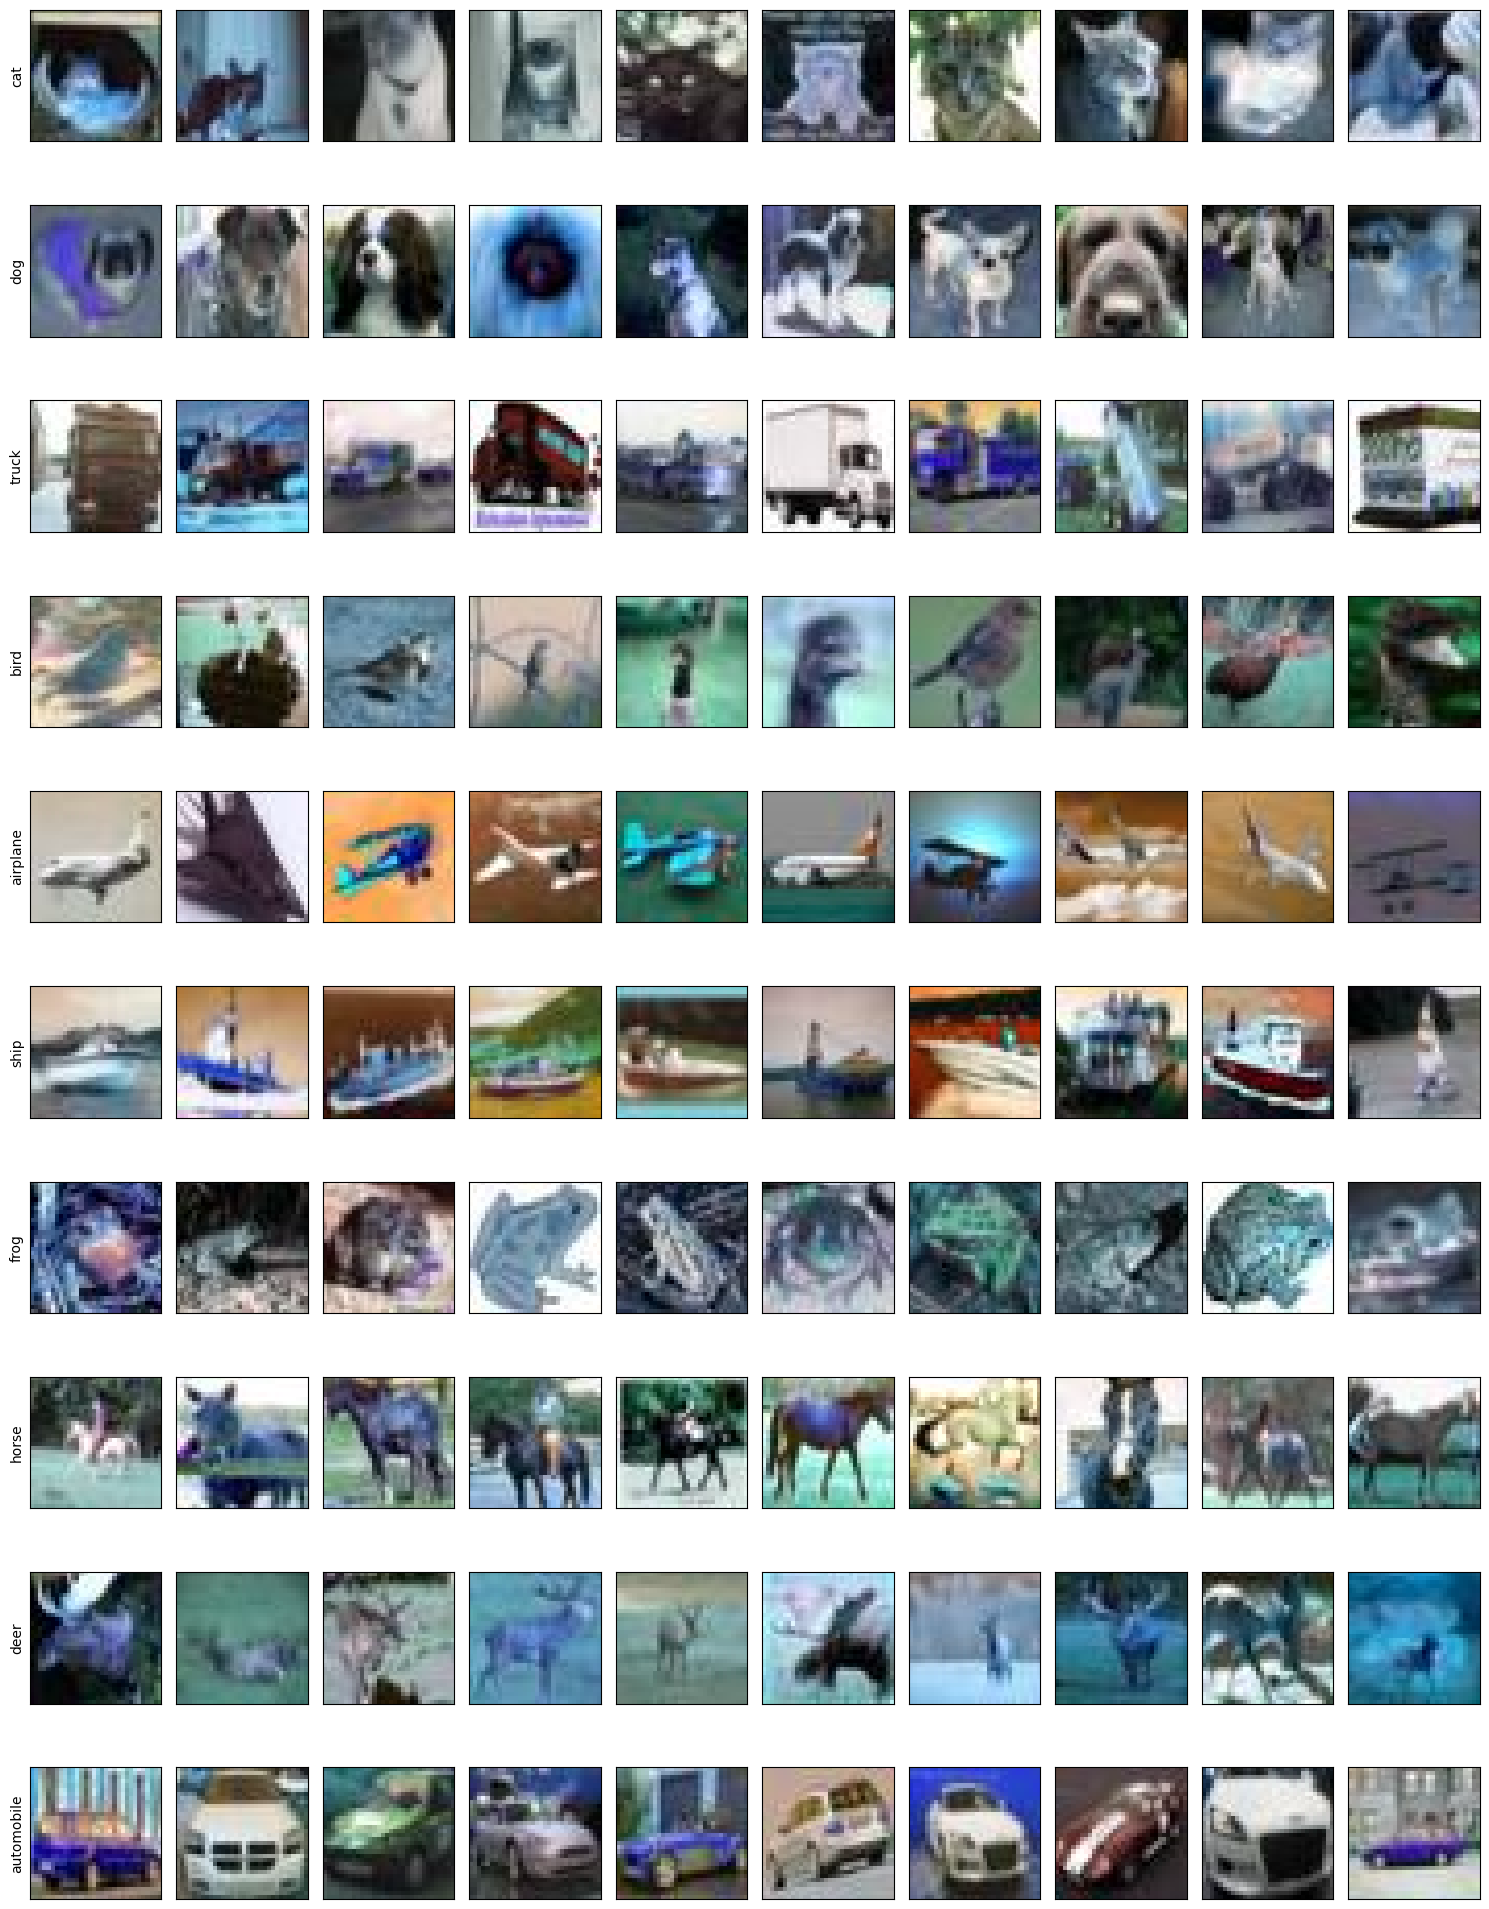

In [17]:
plt.figure(figsize=(15,20))
i = 0
for category in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, category)
    for image_file in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, image_file))
        plt.subplot(10, 10, i+1)
        plt.imshow(image_array)
        if i % 10 == 0:
            plt.ylabel(category)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i % 10 == 0:
            break

plt.tight_layout()
plt.show()


Following code snippet reads and resizes the images (32*32) from the training data directory for each category, storing the resized images and their corresponding class labels in the training_data list.

In [18]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c)
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (32, 32))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass
        
print(len(training_data))

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:03<00:00, 1596.28it/s]

50000


Following code snippet reads and resizes the images (32*32) from the training data directory for each category, storing the resized images and their corresponding class labels in the test_data list.

In [19]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (32, 32))  
            test_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(test_data))

100%|██████████| 1000/1000 [00:00<00:00, 2002.50it/s]

10000


This code shuffles the order of elements in the training_data and test_data. 

In [20]:
random.shuffle(training_data)
random.shuffle(test_data)

This code snippet processes the training_data and test_data list to extract the images and labels, converts them into NumPy arrays, and reshapes(32*32*1) the image array to the appropriate format for further training and processing. Wich will result gray-scaled images. 

In [38]:
X_train = []
Y_train = []

for img, label in training_data:
    # Convert the image to grayscale if needed
    if img.ndim == 3 and img.shape[2] == 3:
        img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1, 32, 32, 1)
Y_train = np.array(Y_train)

print(f"X_train shape= {X_train.shape} Y_train= {Y_train.shape}")


X_train shape= (50000, 32, 32, 1) Y_train= (50000,)


In [39]:
X_test = []
Y_test = []

# for features,label in test_data:
#     X_test.append(features)
#     Y_test.append(label)

for img, label in test_data:
    # Convert the image to grayscale if needed
    if img.ndim == 3 and img.shape[2] == 3:
        img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

    X_test.append(img)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, 32, 32, 1)
Y_test = np.array(Y_test)

print(f"X_test shape= {X_test.shape} Y_test= {Y_test.shape}")

X_test shape= (10000, 32, 32, 1) Y_test= (10000,)


## **Model Building and Evaluation:**
We utilized the k-nearest neighbors (k-NN) algorithm for grayscale CIFAR-10 image classification. Two distance metrics, Manhattan (L1) and Euclidean (L2), were employed to measure image similarity. The model's performance was evaluated using 5-fold cross-validation, which divided the training dataset into subsets for robust evaluation. Varying the hyperparameter K, we recorded and averaged the accuracy achieved for each K value. A graph was plotted to visualize the impact of different K values on accuracy for both distance metrics.

This section highlights our model building approach and evaluation using k-NN with 5-fold cross-validation. The subsequent sections of the report will delve into the detailed results and analysis.

Importing necessary libraries:

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Flatten the grayscale images:
K-NN algorithm expects a 2-dimensional input, we reshape the training and testing data from:

(50000, 32, 32, 1) --> (50000, 1024)

(10000, 32, 32, 1) --> (10000, 1024) 

This flattening process converts the 32x32 images into 1-dimensional arrays, allowing them to be used as input for the k-NN algorithm.